In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
train_clean_df = pd.read_csv('/home/workspace/data/GLDv2/train/train_clean_custom.csv')

In [2]:
train_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1342470 entries, 0 to 1342469
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1342470 non-null  object
 1   landmark_id  1342470 non-null  int64 
 2   description  1342470 non-null  object
 3   language     1342470 non-null  object
dtypes: int64(1), object(3)
memory usage: 41.0+ MB


In [3]:
train_clean_df.head()

,id,landmark_id,description,language
0,17660ef415d37059,1,Luitpoldpark is a public park in the Schwabing...,en
1,92b6290d571448f6,1,Luitpoldpark is a public park in the Schwabing...,en
2,cd41bf948edc0340,1,Luitpoldpark is a public park in the Schwabing...,en
3,fb09f1e98c6d2f70,1,Luitpoldpark is a public park in the Schwabing...,en
4,25c9dfc7ea69838d,7,Die Sparkassen-Arena ist eine Mehrzweckhalle i...,de


- 언어 분포

In [4]:
train_clean_df['language'].value_counts()

language
en    1096962
de     169827
fr      72685
ko       2996
Name: count, dtype: int64

- landmark 종류는 63,428개, 이미지 전체 개수는 1,342,470개
- 6,000개 이미지를 가진 랜드마크가 존재함(landmark id: 138982)
- 그 다음엔 2,000개 이미지를 가진 랜드마크가 존재함(landmark id: 62798)
- 61,583개의 랜드마크가 100개 이하 이미지를 가지고 있음(97.1%)

In [8]:
# displaying only top 30 landmark
landmark = train_clean_df.landmark_id.value_counts()
landmark_df = pd.DataFrame({'landmark_id':landmark.index, 'frequency':landmark.values}).head(30)

landmark_df['landmark_id'] = landmark_df.landmark_id.apply(lambda x: f'landmark_id_{x}')

fig = px.bar(landmark_df, x="frequency", y="landmark_id",color='landmark_id', orientation='h',
             hover_data=["landmark_id", "frequency"],
             height=1000,
             title='Number of images per landmark_id (Top 30 landmark_ids)')
fig.show()

In [10]:
landmark_df = landmark.to_frame(name='frequency')
landmark_df[landmark_df['frequency'] <= 100]

,frequency
landmark_id,
59833,100
63593,100
28989,100
3046,100
89587,100
...,...
101612,2
145164,2
22873,2


In [13]:
str_len_mean = np.mean(train_clean_df['description'].str.len()) # description 길이의 평균값 계산
print('description의 평균 길이 :', round(str_len_mean,0))

description의 평균 길이 : 685.0


In [19]:
train_clean_df['description'].str.len()

0            79
1            79
2            79
3            79
4           341
           ... 
1342465    1739
1342466    1739
1342467    1739
1342468    1739
1342469    1739
Name: description, Length: 1342470, dtype: int64

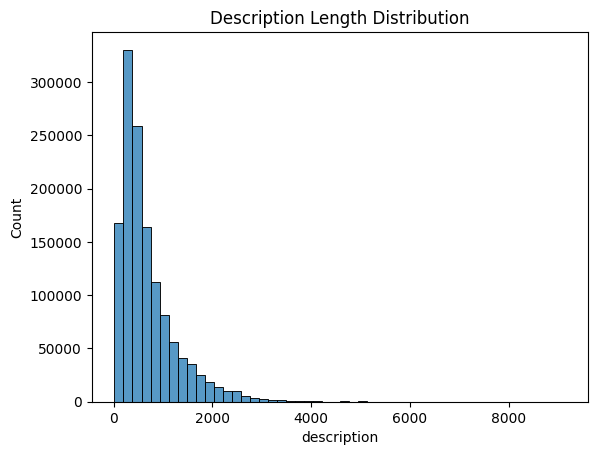

In [17]:
# 히스토그램
fig, ax = plt.subplots()
sns.histplot(train_clean_df['description'].str.len(), bins=50, ax=ax)
ax.set_title("Description Length Distribution")
plt.show()